In [74]:
import pandas as pd
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
df = pd.read_csv("alldata2.csv")
df.columns = [col.strip() for col in df.columns]

In [78]:
df['price'] = df['price'].astype(float).replace('NaN',np.nan)
df = df.interpolate(method = 'linear')
df.index = pd.to_datetime(df['datename'],infer_datetime_format=True)
df = df[pd.notnull(df['price'])]
price = df['price']
deamean_price = df['price'] - df['price'].mean()
resample = price.resample('W').mean()
resample

datename
2003-01-05    42.500000
2003-01-12    45.050000
2003-01-19    43.908000
2003-01-26    47.407500
2003-02-02    46.794000
2003-02-09    54.032001
2003-02-16    54.439999
2003-02-23    59.520001
2003-03-02    87.658000
2003-03-09    76.595999
2003-03-16    53.238000
2003-03-23    51.838000
2003-03-30    45.858000
2003-04-06    47.597999
2003-04-13    52.042001
2003-04-20    47.773999
2003-04-27    44.757999
2003-05-04    40.750000
2003-05-11    41.472000
2003-05-18    51.558000
2003-05-25    61.463749
2003-06-01    66.835001
2003-06-08    50.792000
2003-06-15    46.714000
2003-06-22    51.949999
2003-06-29    57.200000
2003-07-06    54.120000
2003-07-13    59.912001
2003-07-20    66.448000
2003-07-27    58.709999
                ...    
2016-06-12    26.409999
2016-06-19    37.098666
2016-06-26    38.863999
2016-07-03    37.164501
2016-07-10    30.895000
2016-07-17    36.589333
2016-07-24    45.195334
2016-07-31    45.540667
2016-08-07    38.042666
2016-08-14    43.068000
2016-08

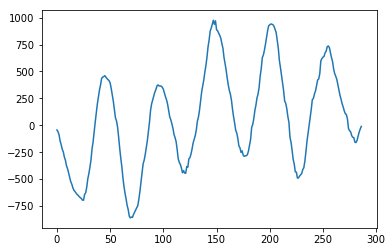

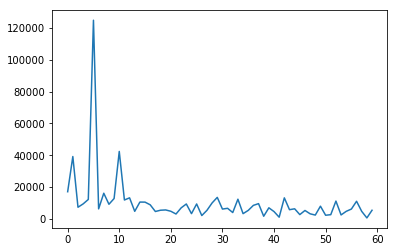

In [69]:
df['multtemp'] = df['multtemp'].astype(float).replace('NaN',np.nan)
df = df.interpolate(method = 'linear')
df.index = pd.to_datetime(df['datename'],infer_datetime_format=True)
df = df[pd.notnull(df['multtemp'])]
multtemp = df['multtemp']
multtempm = df['multtemp'] - df['multtemp'].mean()
resample = multtemp.resample('W').mean()
resample = resample.astype(float)
resamplet = multtempm.resample('W').mean()
resamplet = resamplet.astype(float)
rect = np.ones(26)/26
rect_fft_x = np.convolve(resamplet,rect)
plt.plot(rect_fft_x)
plt.show()
fft_x = np.abs(np.fft.fft(resamplet))
plt.plot(fft_x[:60])
plt.show()

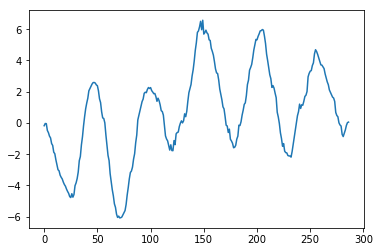

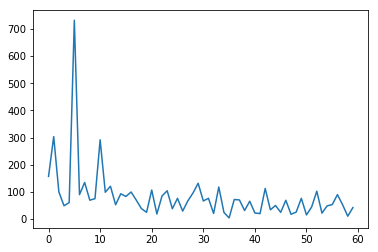

In [71]:
df['highsd'] = df['highsd'].astype(float).replace('NaN',np.nan)
df = df.interpolate(method = 'linear')
df.index = pd.to_datetime(df['datename'],infer_datetime_format=True)
df = df[pd.notnull(df['highsd'])]
multtemp = df['highsd']
multtempm = df['highsd'] - df['highsd'].mean()
resample = multtemp.resample('W').mean()
resample = resample.astype(float)
resamplet = multtempm.resample('W').mean()
resamplet = resamplet.astype(float)
rect = np.ones(26)/26
rect_fft_x = np.convolve(resamplet,rect)
plt.plot(rect_fft_x)
plt.show()
fft_x = np.abs(np.fft.fft(resamplet))
plt.plot(fft_x[:60])
plt.show()

In [18]:
df['price'] = df['price'].astype(float).replace('NaN',np.nan)
df['multtemp'] = df['multtemp'].astype(float).replace('NaN',np.nan)
df = df.interpolate(method = 'linear')

In [19]:
df.index = pd.to_datetime(df['datename'],infer_datetime_format=True)

In [20]:
df = df[pd.notnull(df['price'])]
df = df[pd.notnull(df['multtemp'])]

In [21]:
price = df['price']
pricemean = df['price'] - df['price'].mean()
multtemp = df['multtemp']
multtempm = df['multtemp'] - df['multtemp'].mean()
#temp = df['temp'] - df['temp'].mean()

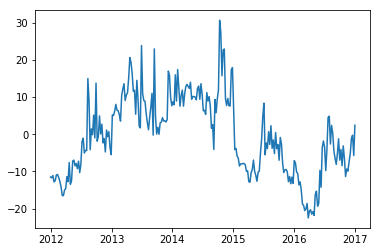

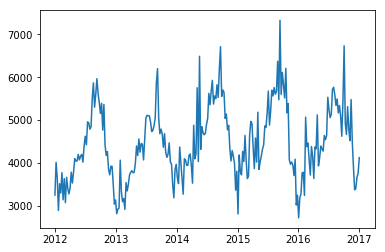

In [50]:
resample = pricemean.resample('W').mean()
resample = resample.astype(float)
plt.plot(resample)
plt.show()
resamplet = multtemp.resample('W').mean()
resamplet = resamplet.astype(float)
plt.plot(resamplet)
plt.show()

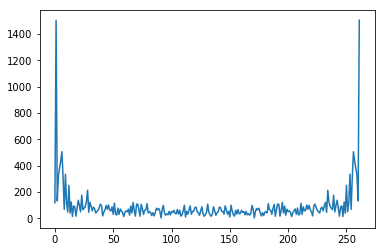

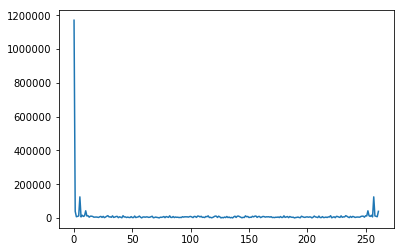

In [55]:
fft_x = np.abs(np.fft.fft(resample))
plt.plot(fft_x)
plt.show()
fft_x_temp = np.abs(np.fft.fft(resamplet))
plt.plot(fft_x_temp)
plt.show()

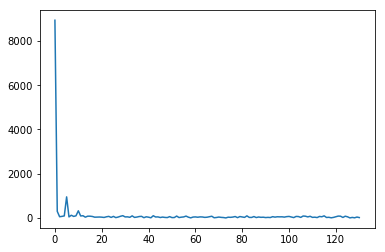

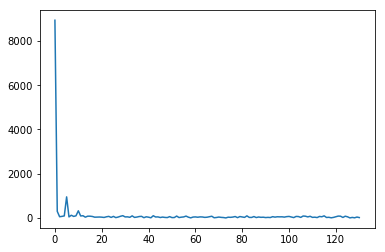

In [40]:
half_fft_x = 2/len(resample) * fft_x[:int(np.ceil(len(resample)/2))]
plt.plot(half_fft_x)
plt.show()
half_fft_x = 2/len(resamplet) * fft_x[:int(np.ceil(len(resamplet)/2))]
plt.plot(half_fft_x)
plt.show()

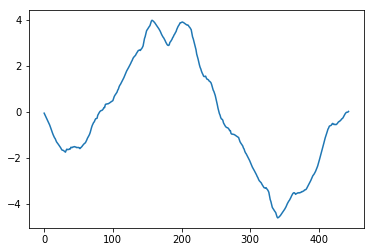

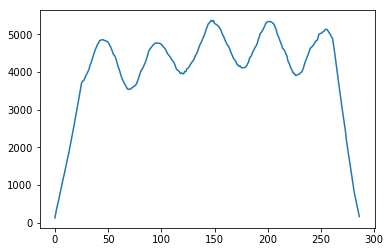

In [44]:
rect = np.ones(183)/183
rect_fft_x = np.convolve(resample,rect)
plt.plot(rect_fft_x)
plt.show()
rect = np.ones(26)/26
rect_fft_x_temp = np.convolve(resamplet,rect)
plt.plot(rect_fft_x_temp)
plt.show()

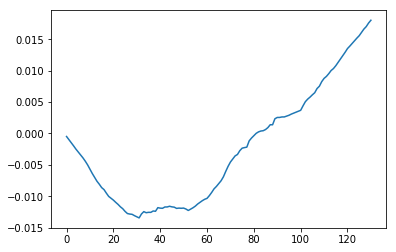

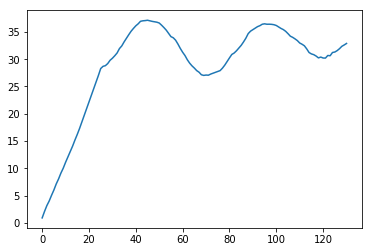

In [46]:
norm_rect_fft_x = 2/len(resample) * rect_fft_x[:int(np.ceil(len(resample)/2))]
plt.plot(norm_rect_fft_x)
plt.show()
norm_rect_fft_x_temp = 2/len(resamplet) * rect_fft_x_temp[:int(np.ceil(len(resamplet)/2))]
plt.plot(norm_rect_fft_x_temp)
plt.show()

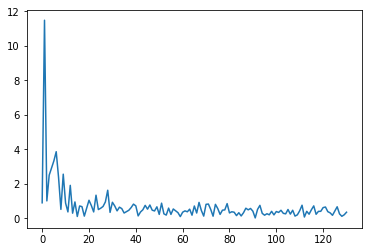

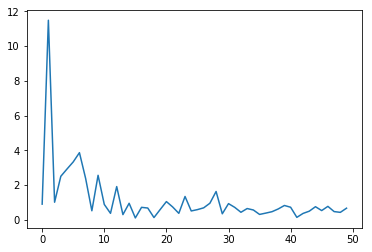

In [47]:
fft_price_mean = np.abs(np.fft.fft(resample))
half_fft_price_mean = 2/len(resample) * fft_price_mean[:int(np.ceil(len(resample)/2))]
plt.plot(half_fft_price_mean)
plt.show()
fft_price_mean_temp = np.abs(np.fft.fft(resamplet))
half_fft_price_mean_temp = 2/len(resamplet) * fft_price_mean[:int(np.ceil(len(resamplet)/2))]
plt.plot(half_fft_price_mean_temp[:50])
plt.show()

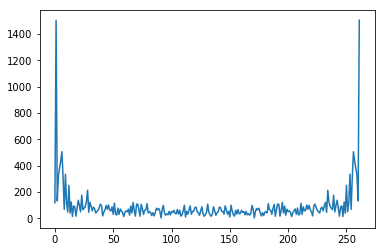

In [53]:
fft_x_res = np.abs(np.fft.fft(resample))
plt.plot(fft_x_res)
plt.show()

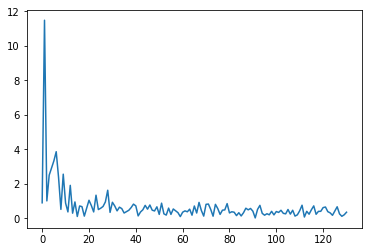

In [57]:
half_fft_x_res = 2/len(resample) * fft_x[:int(np.ceil(len(resample)/2))]
plt.plot(half_fft_x_res)
plt.show()

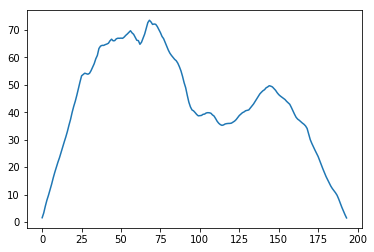

In [14]:
rect = np.ones(26)/26
rect_fft_x = np.convolve(resample,rect)
plt.plot(rect_fft_x)
plt.show()

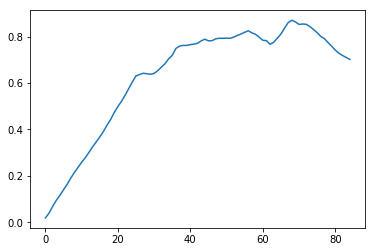

In [15]:
norm_rect_fft_x = 2/len(resample) * rect_fft_x[:int(np.ceil(len(resample)/2))]
plt.plot(norm_rect_fft_x)
plt.show()